In [1]:
#File Name: ccc_segments.ipynb
#Author:
#Objective: "
#To identify different segments in the existing customer, 
#based on their spending patterns as well as past interaction 
#with the bank, using clustering algorithms, 
#and provide recommendations to the bank on how to better market to 
#and service these customers.
#"


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
#Read the data into a csv file
ccc_df = pd.read_csv("Credit Card Customer Data.csv")

In [4]:
ccc_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
# There is no missing data! This is as per the following:
print("Number of Missing Fields:")
print(ccc_df.isnull().sum())

Number of Missing Fields:
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [6]:
#The serial numbers of each customer will not be important for the analysis
ccc_df=ccc_df.drop("Sl_No", axis=1)
ccc_df=ccc_df.drop("Customer Key", axis=1)

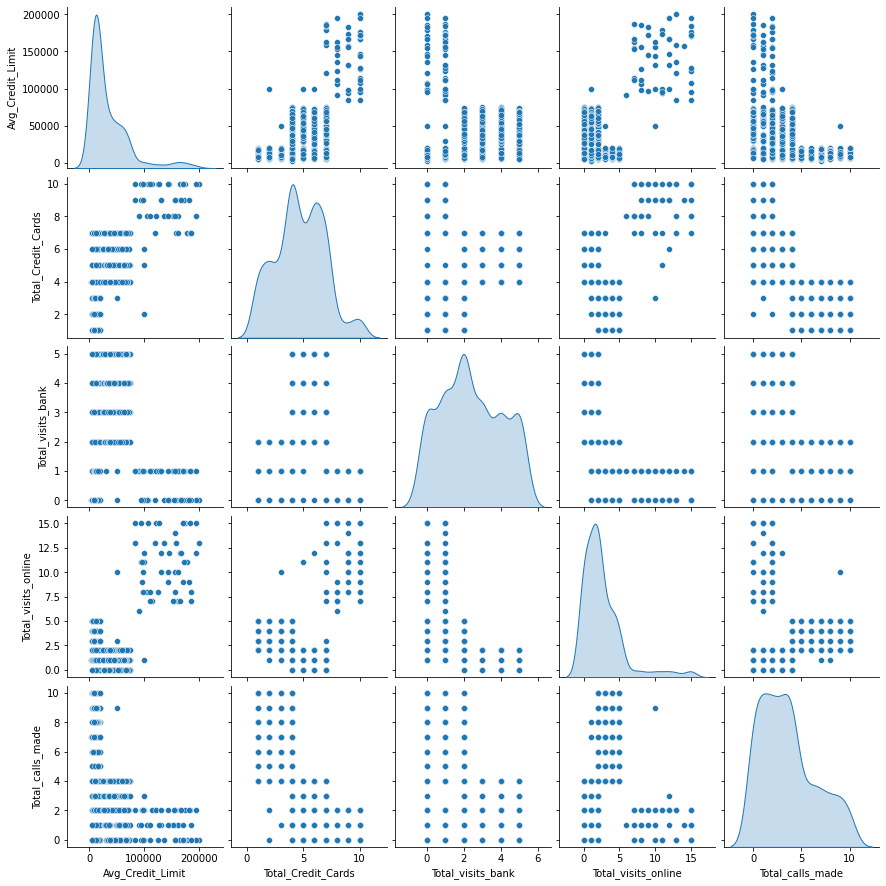

In [7]:
sns.pairplot(ccc_df, diag_kind='kde')

In [8]:
#Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(ccc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [9]:
cccc = ccc_df.groupby(['Total_Credit_Cards'])
cccc.mean()

,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,,
1,11457.627119,0.932203,3.491525,7.220339
2,13187.500000,0.921875,3.531250,6.515625
3,13301.886792,0.867925,3.698113,6.641509
4,26311.258278,2.768212,1.728477,3.529801
5,34689.189189,3.256757,1.216216,2.135135
6,33205.128205,3.555556,1.162393,1.914530
7,44495.049505,3.207921,1.584158,2.099010
8,139454.545455,0.636364,9.272727,0.818182
9,140090.909091,0.727273,11.272727,1.272727


In [10]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(cccc, metric='euclidean', method='average')
c, ccc_dists = cophenet(Z , pdist(ccc_df))

c

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: setting an array element with a sequence.